In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import csv
import math
import matplotlib.pyplot as plt

In [ ]:
!pip install python-louvain
import community.community_louvain as cl

In [ ]:
import community
import matplotlib.cm as cm

## Расчёт уровня инфраструктурной обеспеченности (F)


In [ ]:
import pickle

# Чтение CSV-файла с данными о сервисах
df_services_new = pd.read_csv('infrastructure_31.csv', delimiter=';', index_col=0) # Файл с деревнями и городами этого района

# Чтение матрицы времен из pickle-файла
with open('result_matrix_3.pkl', 'rb') as f:
    time_matrix_new = pickle.load(f)
df_services_new

,school,kindergarten,post,library,culture,atm,health,port,airport,shop
name,,,,,,,,,,
Кепервеем,1,0,1,1,1,0,1,0,1,0
Илирней,1,1,1,1,1,0,1,0,1,0
Островное,1,0,1,1,1,1,1,0,1,0
Анюйск,1,0,1,1,1,0,2,1,1,1
Омолон,1,0,1,1,1,2,2,0,1,1
Черский,1,2,1,1,1,1,3,1,1,9
Нижнеколымск,0,0,0,0,0,0,0,1,0,0
Колымское,1,1,1,1,1,0,2,1,1,1
Андрюшкино,1,1,1,1,1,0,2,0,1,0


In [ ]:
#Задать время
t=13.3
# Преобразование индекса матрицы времен к формату DataFrame
index = df_services_new.index
time_df = pd.DataFrame(time_matrix_new, index=index, columns=index)

# Создание новой пустой таблицы с теми же индексами и колонками, что и исходная
new_df = df_services_new.copy()
new_df[:] = 0

# Создаем новый датафрейм для записи названий деревень и предоставляемых ими сервисов
village_service_providers = pd.DataFrame(columns=['Деревня', 'Сервис'])

# Обновление значений в новой таблице
for village in new_df.index:
    # Находим все деревни, до которых можно добраться за <= t
    reachable_villages = time_df[village][(time_df[village] > 0) & (time_df[village] <= t)].index

    for service in new_df.columns:
        max_value = df_services_new.loc[reachable_villages, service].max()  # Максимальное значение сервиса среди достижимых деревень

        if max_value > df_services_new.at[village, service]:
            new_df.at[village, service] = max_value

            # Запись названия деревни и сервиса в новый датафрейм
            provider_village = reachable_villages[max_value == df_services_new.loc[reachable_villages, service]]
            new_row = {'Деревня': provider_village.values[0], 'Сервис': service}
            village_service_providers = pd.concat([village_service_providers, pd.DataFrame([new_row])], ignore_index=True)

# Сравнение старой и новой таблиц и обновление значений
updated_values = new_df[new_df != 0]
df_services_new.update(updated_values)

# Вывод нового датафрейма с деревнями и предоставляемыми ими сервисами
print(village_service_providers)

           Деревня        Сервис
0         Билибино        school
1          Черский  kindergarten
2         Билибино       culture
3           Омолон           atm
4          Черский        health
..             ...           ...
125  Среднеколымск  kindergarten
126  Среднеколымск       culture
127  Среднеколымск           atm
128  Среднеколымск          shop
129         Омолон           atm

[130 rows x 2 columns]


In [ ]:
df = pd.DataFrame(village_service_providers)

# Группируем строки по обоим столбцам и считаем количество строк в каждой группе
counted_df = df.groupby(['Деревня', 'Сервис']).size().reset_index(name='count')

# Выводим результат
print(counted_df)

          Деревня        Сервис  count
0          Анюйск       airport      4
1          Анюйск       culture      4
2          Анюйск       library      4
3          Анюйск          port      2
4          Анюйск          post      4
5          Анюйск        school      5
6        Билибино       culture      4
7        Билибино        health      2
8        Билибино  kindergarten      2
9        Билибино          port      1
10       Билибино        school      4
11       Билибино          shop      4
12         Омолон           atm      3
13      Островное           atm      1
14  Среднеколымск           atm      6
15  Среднеколымск       culture     10
16  Среднеколымск        health      4
17  Среднеколымск  kindergarten     10
18  Среднеколымск        school     10
19  Среднеколымск          shop     10
20        Черский           atm      8
21        Черский        health     11
22        Черский  kindergarten      8
23        Черский          port      3
24        Черский        

In [ ]:
df_services_new
# Сохранение DataFrame в CSV-файл
df_services_new.to_csv('updated_infrastructure_31.csv', index=True)

In [ ]:
# Нормализация данных
def normalize_columns(df_inf, columns=None):
    if not columns:
        columns = df_inf.columns[1:] # все колонки кроме первой

    for col in columns:
        max_value = float(df_inf[col].max())
        min_value = float(df_inf[col].min())

        df_inf[col] = (df_inf[col].astype('float') - min_value) / (max_value - min_value)
    return df_inf

In [ ]:
# Чтение данных из файла
data_new = pd.read_csv('updated_infrastructure_31.csv', skiprows=[0], delimiter=',', names=['name','school','kindergarden','post','library','culture','atm','health','port','airport','shop'])

df_inf_new = pd.DataFrame(data_new)

# Нормализуем данные
normalized_df_inf_new = normalize_columns(df_inf_new)

# Суммируем нормализованные значения
summed_values_new = normalized_df_inf_new.iloc[:, 1:].sum(axis=1) #Все строки и колонки кроме первых

# Добавляем итоговую сумму к исходному DataFrame
result_df_inf_new = df_inf_new.copy()
result_df_inf_new['ind'] = summed_values_new

result_df_inf_new = result_df_inf_new[[result_df_inf_new.columns[0], result_df_inf_new.columns[-1]]] #Выбираем только столбцы с названием и итоговой оценкой

df_towns = pd.read_csv('main_towns.csv', delimiter = ';') #Читаем файл с опорными городами
combined_df_new = pd.concat([result_df_inf_new, df_towns])

print(combined_df_new.sort_values(by='ind', ascending=False))

             name        ind
12     Красноярск  12.000000
10       Норильск  12.000000
9   Новый Уренгой  12.000000
6         Магадан  12.000000
5          Якутск  12.000000
2     Архангельск  12.000000
1      Нарьян-Мар  11.000000
3         Воркута  11.000000
8      Тарко-Сале  10.000000
0       Кепервеем   9.666667
2       Островное   9.333333
4          Омолон   9.333333
27       Билибино   9.333333
17  Среднеколымск   9.166667
5         Черский   9.166667
7       Колымское   9.166667
23    Алеко-Кюёль   9.166667
3          Анюйск   9.166667
11        Дудинка   9.000000
7           Певек   9.000000
4        Билибино   9.000000
0          Мезень   9.000000
26      Хатынгнах   7.833333
25         Сватай   7.833333
21     Сылгы-Ытар   7.833333
24      Берёзовка   7.833333
22           Эбях   7.833333
18       Аргахтах   7.833333
20      Ойусардах   7.833333
28          Певек   7.590909
6    Нижнеколымск   7.409091
12      Михалкино   7.409091
13        Походск   7.409091
10      Две Ви

In [ ]:
# Удаляем лишние строки
index_to_delete = 27
combined_df_new.drop(index_to_delete, inplace=True)
print(combined_df_new)
# Запись результата в файл
#.to_csv("new_result_inf_3.csv", sep=';', index=False)

             name        ind
0       Кепервеем   9.666667
1         Илирней   4.500000
2       Островное   9.333333
3          Анюйск   9.166667
4          Омолон   9.333333
5         Черский   9.166667
6    Нижнеколымск   7.409091
7       Колымское   9.166667
8      Андрюшкино   7.409091
9        Амбарчик   0.000000
10      Две Виски   7.409091
11       Ермолово   7.409091
12      Михалкино   7.409091
13        Походск   7.409091
14        Тимкино   0.000000
15        Чукочья   1.000000
16      Крестовая   1.000000
17  Среднеколымск   9.166667
18       Аргахтах   7.833333
19        Налимск   3.500000
20      Ойусардах   7.833333
21     Сылгы-Ытар   7.833333
22           Эбях   7.833333
23    Алеко-Кюёль   9.166667
24      Берёзовка   7.833333
25         Сватай   7.833333
26      Хатынгнах   7.833333
0          Мезень   9.000000
1      Нарьян-Мар  11.000000
2     Архангельск  12.000000
3         Воркута  11.000000
4        Билибино   9.000000
5          Якутск  12.000000
6         Мага

Расчёт функции времени (T). Виды транспорта:

## **Расчёт тёплого времени года**

In [ ]:
#Данные на всякий случай сохранить в кодировке utf-8 (через блокнот)
car_ratio=1.1
plane_ratio=1.2
water_ship_ratio=1.2
water_boat_ratio=1.3

# Чтение данных из CSV-файлаw
df = pd.read_csv("warm_time_3.csv", delimiter=';', names=['depart','arrival','car','plane','water_ship','water_boat']) #Перед этим в экселе установить числовой формат и убрвть первую строку с названиями столбцов

#Замена , на .
df['car'] = df['car'].apply(lambda x: x.replace(',', '.')).astype('float')
df['plane'] = df['plane'].apply(lambda x: x.replace(',', '.')).astype('float')
df['water_ship'] = df['water_ship'].apply(lambda x: x.replace(',', '.')).astype('float')
df['water_boat'] = df['water_boat'].apply(lambda x: x.replace(',', '.')).astype('float')
print(df)

#Умножение по столбцам на коэффициенты риска
df['car'] = df['car'].apply(lambda x: car_ratio*x)
df['plane'] = df['plane'].apply(lambda x: plane_ratio*x)
df['water_ship'] = df['water_ship'].apply(lambda x: water_ship_ratio*x)
df['water_boat'] = df['water_boat'].apply(lambda x: water_boat_ratio*x)

# Запись результата в файл
#df.to_csv("result_time.csv", sep=';', index=False)

           depart      arrival  car  plane  water_ship  water_boat
0     Алеко-Кюёль     Билибино  0.0    0.0         0.0         0.0
1     Алеко-Кюёль       Сватай  0.0    0.0         0.0         0.0
2      Андрюшкино  Алеко-Кюёль  0.0    0.0         0.0         0.0
3      Андрюшкино     Аргахтах  0.0    0.0         0.0         0.0
4      Андрюшкино     Билибино  0.0    0.0         0.0         0.0
..            ...          ...  ...    ...         ...         ...
179          Эбях       Сватай  0.0    0.0         0.0         0.0
180  Нижнеколымск      Тимкино  0.0    0.0         0.0         0.0
181  Нижнеколымск     Амбарчик  0.0    0.0         0.0         0.0
182  Нижнеколымск      Чукочья  0.0    0.0         0.0         0.0
183  Нижнеколымск    Крестовая  0.0    0.0         0.0         0.0

[184 rows x 6 columns]


In [ ]:
# Чтение данных из файла
df_time = df

# Получение минимальных значений, игнорируя 0 и первые два столбца
results = df.iloc[:, 2:].replace(0, np.nan).apply(lambda x: x.min(), axis=1)

#Сохранение результатов в таблицу
new_df = df_time.copy()
new_df['min'] = results

#Выбор столбцов с названием н.п. и минимальным временем
min_time_warm = new_df[['depart', 'arrival','min']]

#Заполнение пустых строк нулями
min_time_warm['min'] = min_time_warm['min'].fillna(0)

# Печать результатов и их сохранение в файл
print(min_time_warm)
#min_time_warm.to_csv("min_time_warm_3.csv", sep=';', index=False)

           depart      arrival  min
0     Алеко-Кюёль     Билибино  0.0
1     Алеко-Кюёль       Сватай  0.0
2      Андрюшкино  Алеко-Кюёль  0.0
3      Андрюшкино     Аргахтах  0.0
4      Андрюшкино     Билибино  0.0
..            ...          ...  ...
179          Эбях       Сватай  0.0
180  Нижнеколымск      Тимкино  0.0
181  Нижнеколымск     Амбарчик  0.0
182  Нижнеколымск      Чукочья  0.0
183  Нижнеколымск    Крестовая  0.0

[184 rows x 3 columns]


<ipython-input-35-4670e98c2406>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_time_warm['min'] = min_time_warm['min'].fillna(0)


In [ ]:
# Находим среднее значение третьего столбца
mean_value = min_time_warm['min'].mean()
print(f"Среднее значение: {mean_value}")

# Находим минимальное значение, исключая ноль
non_zero_min = min_time_warm.loc[min_time_warm['min'] != 0, 'min'].min()
print(f"Минимальное значение (без нуля): {non_zero_min}")
# Находим максимальное значение
max_value = min_time_warm['min'].max()
print(f"Максимальное значение: {max_value}")

Среднее значение: 1.1650472826086957
Минимальное значение (без нуля): 0.2376
Максимальное значение: 13.933700000000002


## Расчёт гравитационной силы (G)

In [ ]:
#Чтение файлов с уровнем инфраструктурной обеспеченности и данными по времени
settl = dict(zip(combined_df_new['name'], combined_df_new['ind']))
connect = min_time_warm.values.tolist()
gravity = []


#Преобразование данных и вычисление
for i in range(len(connect)):
    F1=float(settl[connect[i][0]])
    F2=float(settl[connect[i][1]])
    r=float(connect[i][2])
    if r == 0:
        LocalGravity = 0
    else:
        LocalGravity = (F1 - F2) / (r ** 2) #Убрать модуль, чтобы граф стал направленным, тогда можно анализировать что к чему притягивается
    gravity.append([connect[i][0],connect[i][1],LocalGravity])

#Сохранение данных в файл csv
local_gravity_new = pd.DataFrame(gravity, columns=['settl1', 'settl2','LocalGravity'])
local_gravity_new.to_csv('new_Local_gravity_warm_3.csv', sep=';', index=False)

print(local_gravity_new)

           settl1       settl2  LocalGravity
0      Андрюшкино     Аргахтах           0.0
1      Андрюшкино     Билибино           0.0
2      Андрюшкино      Налимск           0.0
3      Андрюшкино    Ойусардах           0.0
4      Андрюшкино       Сватай           0.0
..            ...          ...           ...
161          Эбях  Алеко-Кюёль           0.0
162          Эбях       Сватай           0.0
163  Нижнеколымск     Амбарчик           0.0
164  Нижнеколымск      Чукочья           0.0
165  Нижнеколымск    Крестовая           0.0

[166 rows x 3 columns]


In [ ]:
df_row = local_gravity_new

# Функция для обработки строк
def process_row(row):
    if row['LocalGravity'] < 0:
        # Меняем города местами и делаем значение положительным
        row['settl1'], row['settl2'] = row['settl2'], row['settl1']
        row['LocalGravity'] = abs(row['LocalGravity'])
    return row

# Применяем функцию ко всем строкам
df_row = df_row.apply(process_row, axis=1)
df_row.sort_values(by='LocalGravity', ascending=False)

,settl1,settl2,LocalGravity
155,Черский,Походск,31.133015
140,Среднеколымск,Хатынгнах,16.624640
57,Кепервеем,Илирней,14.069064
139,Среднеколымск,Сылгы-Ытар,8.930268
137,Среднеколымск,Ойусардах,3.630726
...,...,...,...
62,Кепервеем,Ойусардах,0.000000
66,Кепервеем,Сватай,0.000000
67,Кепервеем,Среднеколымск,0.000000
68,Кепервеем,Сылгы-Ытар,0.000000


In [ ]:
#Нормирование значений
def normalize_column_and_sort_descending(df_norm, column_name):
    # Получаем минимальное и максимальное значения в колонке
    min_value = df_norm[column_name].min()
    max_value = df_norm[column_name].max()

    # Нормализуем значения от 0 до 100
    df_norm[column_name] = ((df_norm[column_name] - min_value) / (max_value - min_value)) * 100

    # Сортируем таблицу по нормализованному столбцу в порядке убывания
    df_norm.sort_values(by=column_name, ascending=False, inplace=True)

    return df_norm

df_norm = df_row
sorted_normalized_df = normalize_column_and_sort_descending(df_norm, 'LocalGravity')
print(sorted_normalized_df)

            settl1         settl2  LocalGravity
155        Черский        Походск    100.000000
140  Среднеколымск      Хатынгнах     53.398746
57       Кепервеем        Илирней     45.190174
139  Среднеколымск     Сылгы-Ытар     28.684238
137  Среднеколымск      Ойусардах     11.661980
..             ...            ...           ...
62       Кепервеем      Ойусардах      0.000000
66       Кепервеем         Сватай      0.000000
67       Кепервеем  Среднеколымск      0.000000
68       Кепервеем     Сылгы-Ытар      0.000000
165   Нижнеколымск      Крестовая      0.000000

[166 rows x 3 columns]


## Создание графа и его анализ

### Граф по G

In [ ]:
# Чтение данных
data_graph = sorted_normalized_df

# Создание направленного графа
G = nx.DiGraph()
# Проверить имена столбцов
print(data_graph.columns)

Index(['settl1', 'settl2', 'LocalGravity'], dtype='object')


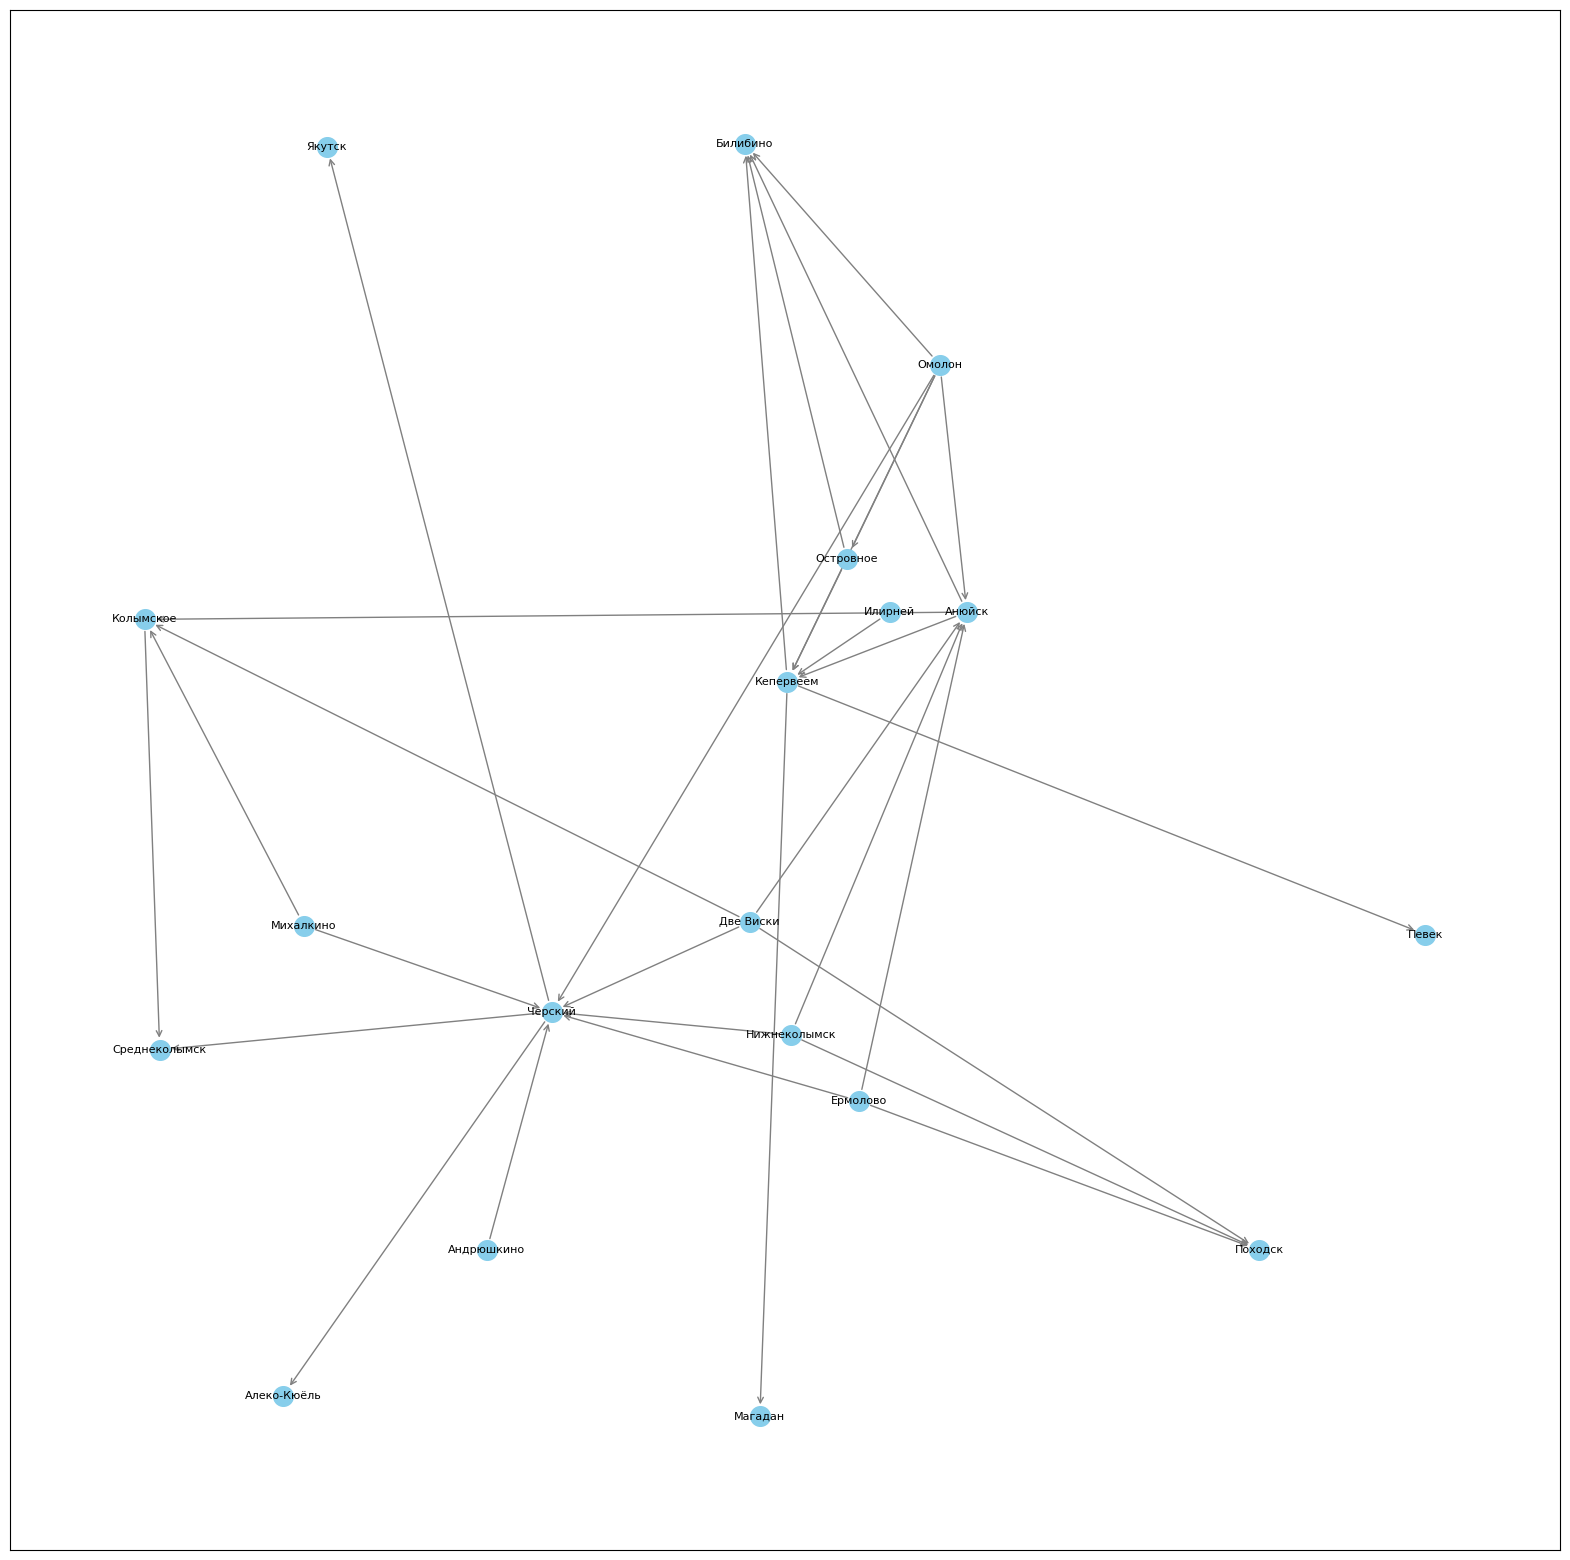

In [ ]:
for _, row in data_graph.iterrows():
    source = row['settl2']  # Начальная вершина
    target = row['settl1']  # Конечная вершина
    gravity_force = row['LocalGravity']

    # Проверяем, чтобы гравитационная сила была ненулевой
    if gravity_force != 0:
        G.add_edge(source, target, weight=gravity_force)

# Настройка параметров для визуализации
pos = nx.spring_layout(G, k=1, scale=3)  # Расположение узлов
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}  # Метки для рёбер
plt.figure(figsize=(20,20))  # Размер графика
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue')  # Узлы
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowstyle='->', arrows=True)  # Рёбра
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)  # Метки рёбер

plt.savefig("graph_warm_G_3.png", format="png")

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
# Получение списка всех узлов
all_nodes = list(G.nodes())
# Подсчет количества входящих рёбер для каждого узла
incoming_counts = {}
for node in all_nodes:
    incoming_count = len(list(G.predecessors(node)))
    incoming_counts[node] = incoming_count

# Получение топ-10 узлов с наибольшим количеством входящих рёбер
top_10_nodes = Counter(incoming_counts).most_common(10)

# Печать результата
for node, count in top_10_nodes:
    print(f"{node}: {count}")

### Граф по Т

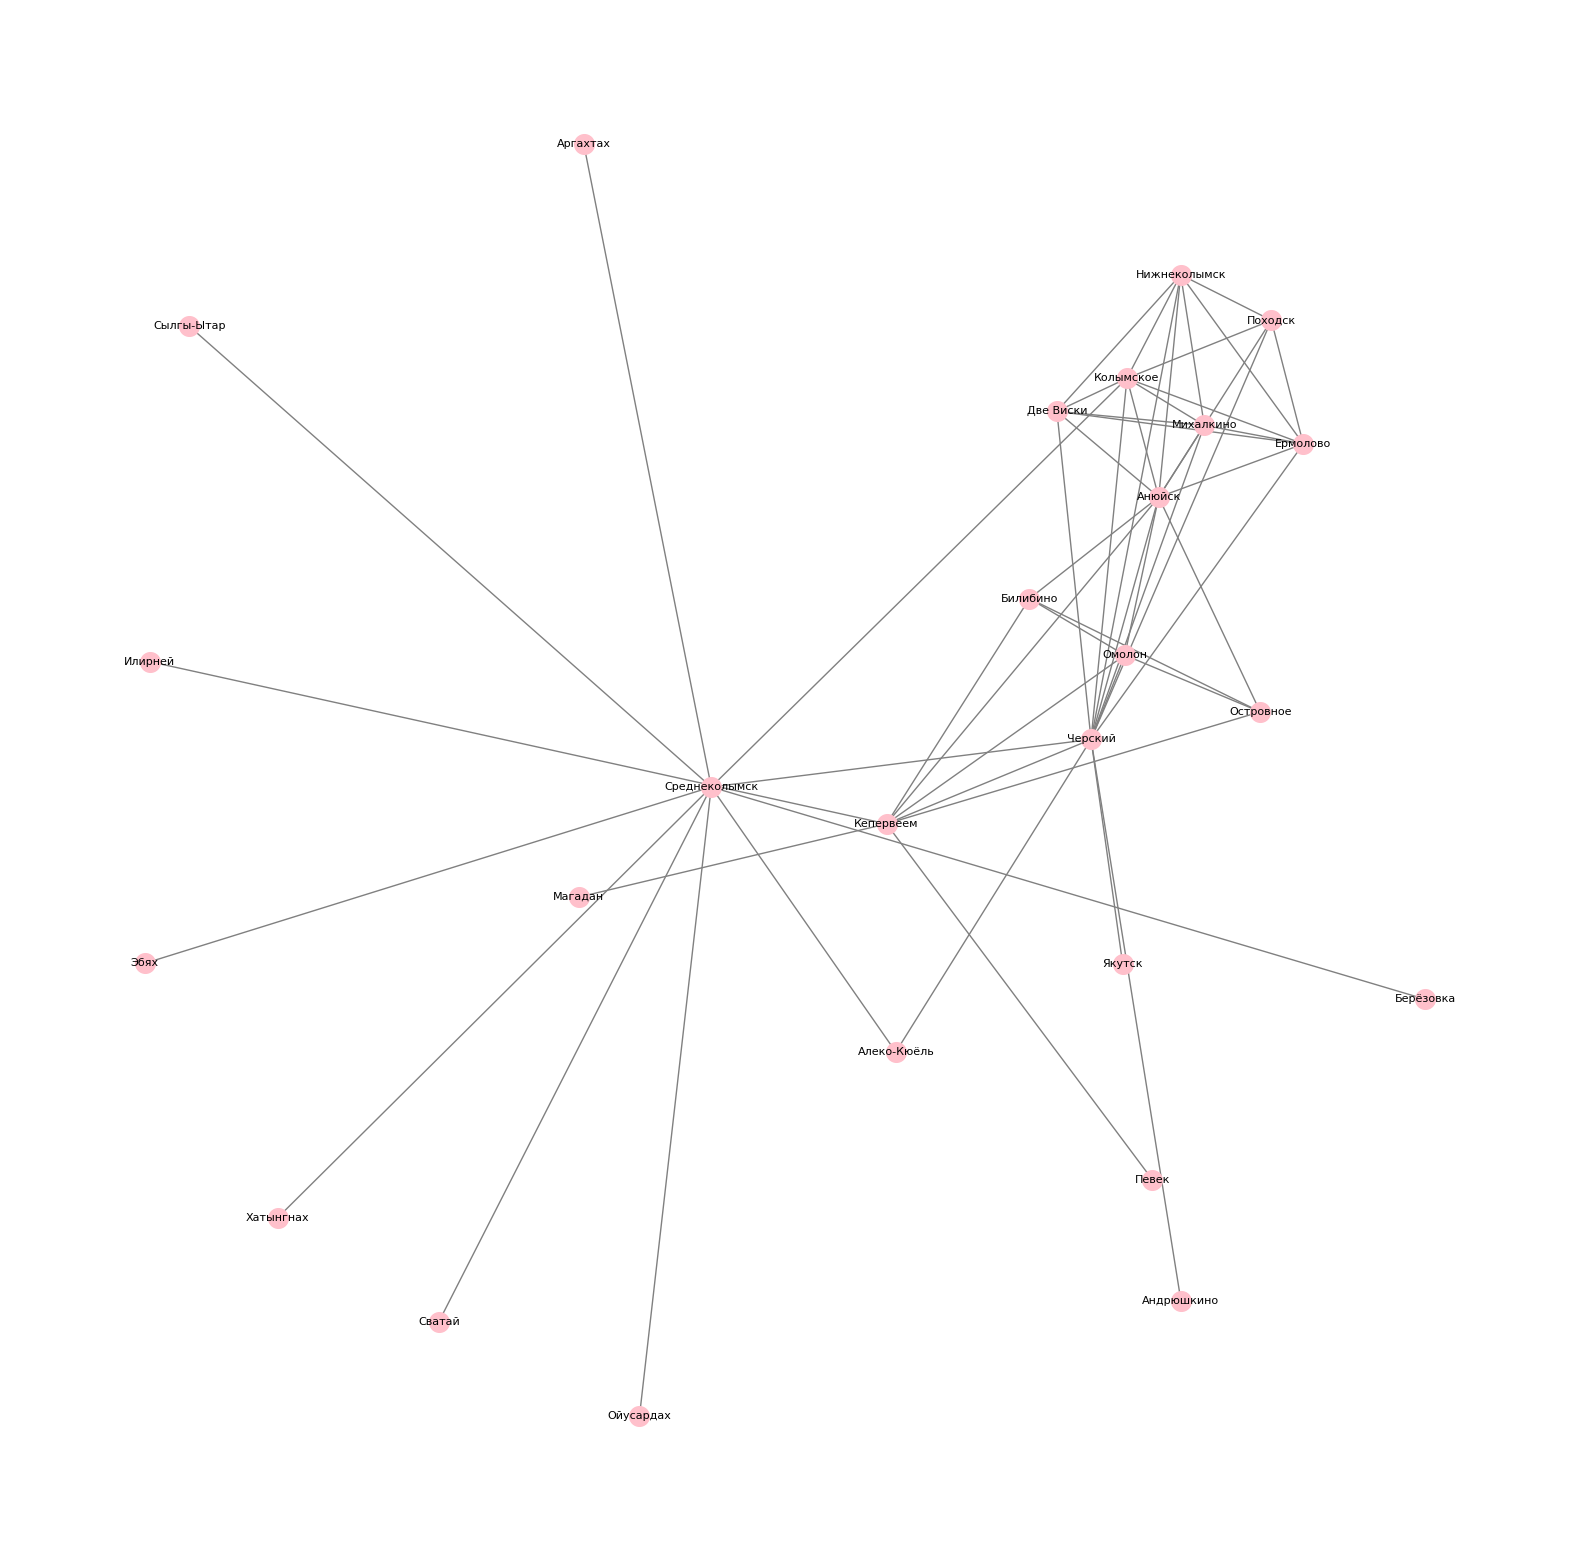

Черский: 13
Анюйск: 11
Среднеколымск: 10
Кепервеем: 8
Колымское: 8
Ермолово: 7
Нижнеколымск: 7
Две Виски: 6
Михалкино: 6
Омолон: 5


In [ ]:
# Чтение данных из CSV-файла
data_graph_time = min_time_warm

# Создаем пустой ненаправленный граф
G_time = nx.Graph()
for _, row in data_graph_time.iterrows():
    settl1 = row['depart']
    settl2 = row['arrival']
    time = row['min']

    # Если время между деревнями не равно нулю, добавляем ребро
    if time != 0:
        G_time.add_edge(settl1, settl2, weight=time)

# Настройка параметров для визуализации
pos_time = nx.spring_layout(G_time, k=1, scale=4)  # Расположение узлов
edge_labels_time = {(u, v): d['weight'] for u, v, d in G_time.edges(data=True)}  # Метки для рёбер
G_time
plt.figure(figsize=(20,20))  # Размер графика
nx.draw_networkx_nodes(G_time, pos_time, node_size=200, node_color='pink')  # Узлы
nx.draw_networkx_edges(G_time, pos_time, edge_color='gray')  # Рёбра
nx.draw_networkx_labels(G_time, pos_time, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(G_time, pos_time, edge_labels=edge_labels, font_size=10)  # Метки рёбер

#Визуализация
plt.axis('off')
plt.show()
# Подсчет количества рёбер для каждого узла
degree_counts = dict(G_time.degree())

# Получение топ-10 узлов с наибольшим количеством рёбер
top_10_nodes = Counter(degree_counts).most_common(10)

# Печать результата
for node, count in top_10_nodes:
    print(f"{node}: {count}")

### Анализ графа

### Анализ кластеров

In [ ]:
data_graph_G = sorted_normalized_df
# Создание ненаправленного графа
G_undirect = nx.Graph()

for _, row in data_graph_G.iterrows():
    vertex1 = row['settl1']  # Первая вершина
    vertex2 = row['settl2']  # Вторая вершина
    gravity_force = row['LocalGravity']

    # Проверяем, чтобы гравитационная сила была ненулевой
    if gravity_force != 0:
        G_undirect.add_edge(vertex1, vertex2, weight=gravity_force)
G_undirect
# Настройка параметров для визуализации
pos = nx.spring_layout(G_undirect)  # Расположение узлов
edge_labels = {(u, v): d['weight'] for u, v, d in G_undirect.edges(data=True)}  # Метки для рёбер
plt.figure(figsize=(10,10))  # Размер графика
nx.draw_networkx_nodes(G_undirect, pos, node_size=200, node_color='skyblue')  # Узлы
nx.draw_networkx_edges(G_undirect, pos, edge_color='gray')  # Рёбра
nx.draw_networkx_labels(G_undirect, pos, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(G_undirect, pos, edge_labels=edge_labels, font_size=10)  # Метки рёбер

#Визуализация
plt.axis('off')
plt.show()

### Обратный граф

In [ ]:
import pandas as pd
# Функция для обработки значений
def  gravity_reverse(x):
    if x == 0:
        return 0
    else:
        return 1 / x

# Применяем функцию к столбцу 'Цена'
df_reverse = sorted_normalized_df.copy()
df_reverse['reverse_gravity'] = df_reverse['LocalGravity'].apply(gravity_reverse)

columns_to_drop = ['LocalGravity']
df_reverse.drop(columns_to_drop, axis=1, inplace=True)
#df_reverse.sort_values(by='reverse_gravity', ascending=False)

In [ ]:
#Граф с обратным G (то есть 1/G)
data_reverse = df_reverse
# Создание направленного графа
G_reverse = nx.DiGraph()
for _, row in data_reverse.iterrows():
    source = row['settl2']  # Начальная вершина
    target = row['settl1']  # Конечная вершина
    gravity_force = row['reverse_gravity']

    # Проверяем, чтобы гравитационная сила была ненулевой
    if gravity_force != 0:
        G_reverse.add_edge(source, target, weight=gravity_force)

# Настройка параметров для визуализации
pos = nx.spring_layout(G_reverse, k=4, scale=4)  # Расположение узлов
edge_labels = {(u, v): d['weight'] for u, v, d in G_reverse.edges(data=True)}  # Метки для рёбер
plt.figure(figsize=(20,20))  # Размер графика
nx.draw_networkx_nodes(G_reverse, pos, node_size=200, node_color='lightgreen')  # Узлы
nx.draw_networkx_edges(G_reverse, pos, edge_color='gray', arrowstyle='->', arrows=True)  # Рёбра
nx.draw_networkx_labels(G_reverse, pos, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(G_reverse, pos, edge_labels=edge_labels, font_size=10)  # Метки рёбер

#Визуализация
plt.axis('off')
plt.show()

### Кластеризация

In [ ]:
# Выполнение модулярной кластеризации. мера качества разбиения графа на сообщества. Она позволяет находить группы узлов, внутри которых связи сильнее, чем снаружи.
partition = cl.best_partition(G_undirect)
mod = cl.modularity(partition, G_undirect)

print("Модулярность:", mod)

# Распечатка сообществ
communities = {}
for node, com_id in partition.items():
    if com_id not in communities:
        communities[com_id] = []
    communities[com_id].append(node)

for com_id, nodes in communities.items():
    print(f"Сообщество {com_id + 1}: {', '.join(nodes)}")

In [ ]:
from networkx.algorithms.centrality import degree_centrality

communities = partition.values()
community_centers = {}

for comm_id in set(communities):
    nodes_in_comm = [node for node, c in partition.items() if c == comm_id]
    degrees = {node: G_undirect.degree(node) for node in nodes_in_comm}
    center = max(degrees, key=degrees.get)
    community_centers[comm_id] = center
print("Центры сообществ:", community_centers)

### Выявление частовстречаемых поселений

In [ ]:
# Расчёт степенной центральности
degree = nx.degree_centrality(G)

# Сортируем населённые пункты по уменьшению степенной центральности
sorted_centralities = sorted(degree.items(), key=lambda x: x[1], reverse=True)

# Вывод результатов
for node, centrality in sorted_centralities:
    print(f"{node}: {centrality:.4f}")

In [ ]:
#Вершины на концах мостов. Критичны для удаления
bridges = list(nx.bridges(G_undirect))
bridge_nodes = set([u for u, _ in bridges] + [v for _, v in bridges])
print(bridge_nodes)

In [ ]:
#Только для графа с временем
# Вычисляем промежуточную центральность для каждого узла. Центральность по промежуточности, показывает, насколько часто узел находится на кратчайших путях между другими узлами графа

bc = nx.betweenness_centrality(G_reverse, normalized=False)
sorted_bc = sorted(bc.items(), key=lambda item: item[1], reverse=True)
important_nodes_bc = [k for k, v in sorted_bc[:7]]
print(important_nodes_bc)

In [ ]:
#Только для графа с временем
#Центральность по близости, показывает, насколько быстро можно достичь всех других узлов графа из данного узла. Можно оценить, насколько населенный пункт является "опорным" с точки зрения доступности остальных точек

cc = nx.closeness_centrality(G_reverse)
sorted_cc = sorted(cc.items(), key=lambda item: item[1], reverse=True)
important_nodes_cc = [k for k, v in sorted_cc[:7]]
print(important_nodes_cc)

In [ ]:
from collections import Counter
def sort_nodes_by_frequency(degree_centrality, closeness_centrality, betweenness_centrality, bridge_endpoints):
    # Преобразуем множества в списки, если они таковыми являются
    if isinstance(degree_centrality, set):
        degree_centrality = list(degree_centrality)
    if isinstance(closeness_centrality, set):
        closeness_centrality = list(closeness_centrality)
    if isinstance(betweenness_centrality, set):
        betweenness_centrality = list(betweenness_centrality)
    if isinstance(bridge_endpoints, set):
        bridge_endpoints = list(bridge_endpoints)

    # Объединяем все списки узлов в один большой список
    all_nodes = degree_centrality + closeness_centrality + betweenness_centrality + bridge_endpoints

    # Подсчитываем частоту встречаемости каждого узла
    node_counts = Counter(all_nodes)

    # Сортируем узлы по убыванию частоты
    sorted_nodes = sorted(node_counts.items(), key=lambda x: (-x[1], x[0]))

    return sorted_nodes

sorted_list = sort_nodes_by_frequency(hubs, important_nodes_cc, important_nodes_bc, bridge_nodes)
print(sorted_list)

### Поиск минимального остовного дерева (толька на ненаправленных графах)

In [ ]:
# Находим минимальное остовное дерево с помощью алгоритма Борувка
MST = nx.minimum_spanning_tree(G_time, algorithm='boruvka')
# Визуализация минимального остовного дерева
pos_MST = nx.spring_layout(MST)  # Расположение вершин
labels = nx.get_edge_attributes(MST, 'weight')  # Вес каждого ребра
plt.figure(figsize=(10, 10))  # Размер графика
# Настройка параметров для визуализации
pos_MST = nx.spring_layout(MST)  # Расположение узлов
nx.draw_networkx_nodes(MST, pos_MST, node_size=200, node_color='violet')  # Узлы
nx.draw_networkx_edges(MST, pos_MST, edge_color='gray')  # Рёбра
nx.draw_networkx_labels(MST, pos_MST, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(MST, pos_MST, edge_labels=edge_labels, font_size=10)  # Метки рёбер

plt.title('Минимальное Остовное Дерево')
plt.show()

### Определение узлов-стоков и узлов-источников

In [ ]:
#Определение узлов без входящих/исходящих рёбер (только для направленных графов)
def find_sources_and_sinks(G):
    sources = []
    sinks = []

    # Проверяем каждую вершину
    for node in G.nodes():
        has_incoming_edge = False
        has_outgoing_edge = False

        # Проверка наличия входящих рёбер
        for other_node in G.predecessors(node):
            has_incoming_edge = True
            break

        # Проверка наличия исходящих рёбер
        if len(list(G.successors(node))) > 0:
            has_outgoing_edge = True

        # Добавляем вершину в соответствующий список
        if not has_incoming_edge:
            sources.append(node)
        if not has_outgoing_edge:
            sinks.append(node)

    return sources, sinks

# Получение результатов
sources, sinks = find_sources_and_sinks(G)
print("Sources:", sources)
print("Sinks:", sinks)

# Сравнение графов

In [ ]:
#Сравнение двух направленных графов
def compare_digraphs(G_old, G_new):
    # Степенная центральность узлов
    degree_centrality_old = nx.degree_centrality(G_old)
    degree_centrality_new = nx.degree_centrality(G_new)

    # Минимальное остовное дерево
    mst_old = nx.minimum_spanning_tree(G_old.to_undirected())
    mst_new = nx.minimum_spanning_tree(G_new.to_undirected())

    # Количество компонент слабой связности
    weakly_connected_components_old = list(nx.weakly_connected_components(G_old))
    weakly_connected_components_new = list(nx.weakly_connected_components(G_new))

    # Количество узлов только с входящими/выходящими рёбрами
    only_incoming_nodes_old = [node for node, out_degree in G_old.out_degree() if out_degree == 0]
    only_outgoing_nodes_old = [node for node, in_degree in G_old.in_degree() if in_degree == 0]

    only_incoming_nodes_new = [node for node, out_degree in G_new.out_degree() if out_degree == 0]
    only_outgoing_nodes_new = [node for node, in_degree in G_new.in_degree() if in_degree == 0]

    # Вывод результатов
    print("Степенная центральность:")
    sorted_nodes = sorted(set(degree_centrality_old.keys()) | set(degree_centrality_new.keys()), key=lambda x: -(degree_centrality_old.get(x, 0) + degree_centrality_new.get(x, 0)))
    for node in sorted_nodes:
        old_value = degree_centrality_old.get(node, None)
        new_value = degree_centrality_new.get(node, None)
        print(f"{node}: старый граф - {old_value}, новый граф - {new_value}")

    print("\nМинимальные остовные деревья:")
    print(f"Старый граф: {mst_old.edges()}")
    print(f"Новый граф: {mst_new.edges()}")

    print("\nКоличество компонент слабой связности:")
    print(f"Старый граф: {len(weakly_connected_components_old)}")
    print(f"Новый граф: {len(weakly_connected_components_new)}")

    print("\nКоличество узлов только с входящими рёбрами:")
    print(f"Старый граф: {only_incoming_nodes_old}")
    print(f"Новый граф: {only_incoming_nodes_new}")

    print("\nКоличество узлов только с выходящими рёбрами:")
    print(f"Старый граф: {only_outgoing_nodes_old}")
    print(f"Новый граф: {only_outgoing_nodes_new}")

compare_digraphs(G, G_deleted)